# EE2073 Lab 5
### Author: Nguyen Hoang Khanh (Kelvin)

#### Question 1. VCA gain measurement

| Amplitude (V) | V<sub>a</sub> (V) | V<sub>IN</sub>-pp (V) | V<sub>OUT</sub>-pp (V) |
|---------------|---------------|---------------------|----------------------|
| 3.0           | 5.4           | 5.89                | 31.14m               |
| 2.23          | 4.5           | 4.33                | 49.94m               |
| 2.23          | 3.6           | 4.36                | 105.59m              |
| 2.23          | 2.7           | 4.39                | 259.65m              |
| 1.23          | 1.8           | 2.45                | 365.33m              |
| 1.23          | 0.9           | 2.42                | 911.18m              |
| 1.23          | 0.0           | 2.49                | 2.60                 |
| 0.92          | -0.9          | 1.74                | 4.49                 |
| 0.82          | -1.8          | 1.56                | 9.77                 |
| 0.82          | -2.7          | 1.57                | 23.67                |

When Amplitude = 2.23 V and V<sub>a</sub> = 2.7 V:\
![alt text](lab5_4.1_2.23vs2.7.png)

When Amplitude = 0.92 V and V<sub>a</sub> = -0.9 V:\
![alt text](lab5_4.1_0.92vs-0.9.png)

When Amplitude = 0.82 V and V<sub>a</sub> = -1.8 V:\
![alt text](lab5_4.1_0.82vs-1.8.png)

Comment: Overall it is non-inverting amplification. There is no phase shifting.

#### Question 2. VCA gain characterization

Import necessary libraries

In [1]:
import numpy as np
import plotly.graph_objs as go

Create NumPy arrays

In [2]:
v_a = np.array([5.4, 4.5, 3.6, 2.7, 1.8, 0.9, 0, -0.9, -1.8, -2.7])
v_IN = np.array([5.89, 4.33, 4.36, 4.39, 2.45, 2.42, 2.49, 1.74, 1.56, 1.57])
v_OUT = np.array([31.14e-3, 49.94e-3, 105.59e-3, 259.65e-3, 365.33e-3, 911.18e-3, 2.60, 4.49, 9.77, 23.67])

Calculate V<sub>C</sub> and the corresponding gain

In [3]:
v_C = 3.3/(56 + 3.3)*v_a # Eq. (5.2)
gain = 20*np.log10(v_OUT/v_IN) # Eq. (5.3)

Plot Gain (dB) versus V<sub>C</sub> (V)

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=v_C, y=gain, mode='markers', name='Measured gain'))
fig.update_layout(xaxis_title='V<sub>C</sub> (V)', yaxis_title='Gain (dB)')

Observation: The plot looks linear, which means it is correct.

Find the correlation between Gain (dB) and V<sub>C</sub> (V), in terms of coefficient and intercept

In [5]:
coef = np.polyfit(v_C, gain, deg=1) # deg=1 for order 1 polynomial (linear)
fit = coef[0]*v_C + coef[1]

lab_temp = 25 # laboratory temperature
gain_spec = -v_C/(0.006*(1 + 0.0033*(lab_temp - 25))) # Eq. (5.1)

fig.add_trace(go.Scatter(x=v_C, y=fit, mode='lines', line=dict(dash='dash'), name='Best fit'))
fig.add_trace(go.Scatter(x=v_C, y=gain_spec, mode='lines', line=dict(dash='dot'), name='Specified gain'))

Comment: measured values are close to the best fit line, as well as the specified gain of -6 mV/dB.

In [11]:
print("Measured gain coefficient: ", (1/coef[0])*10**3, " mV/dB")

Measured gain coefficient:  -6.404133200879292  mV/dB


This is close to the specified value of -6 mV/dB. The error is 0.4 mV/dB, which is within 10% tolerance.

##### Try running with small signal and high V<sub>a</sub>

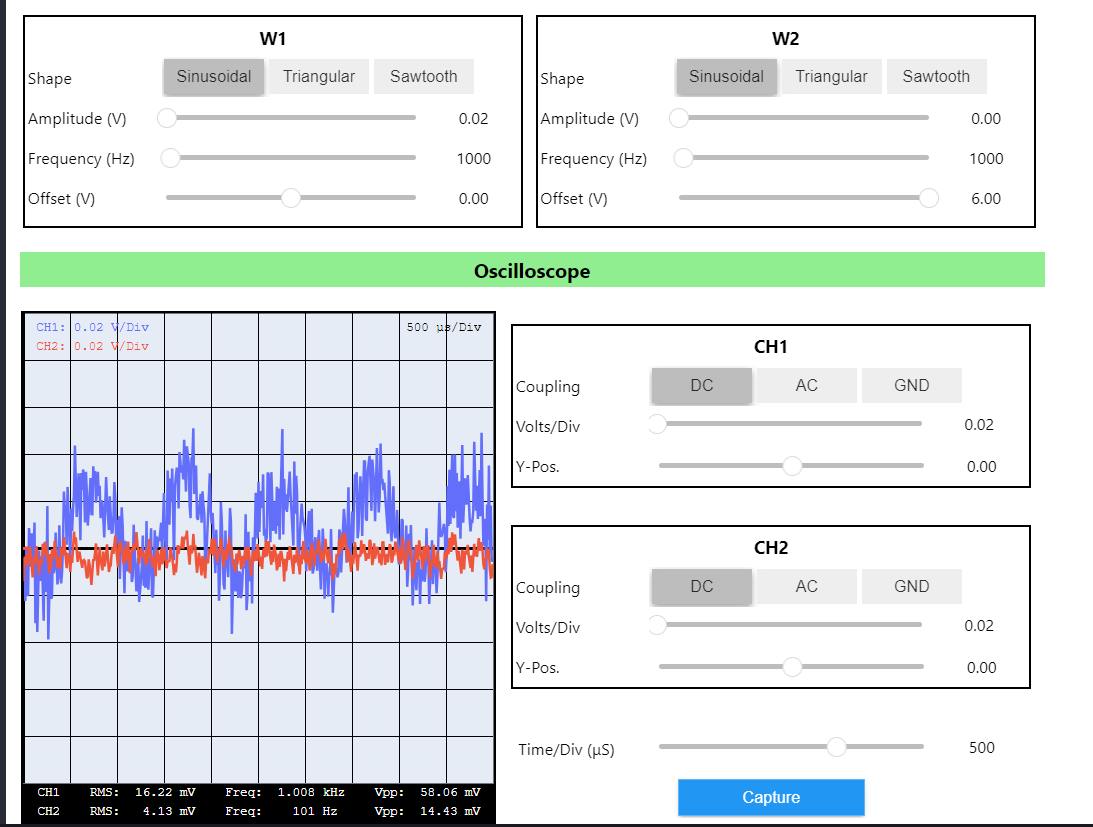

Observation: The input and output signals are prone to noise.

##### Try running with high signal and high V<sub>a</sub>

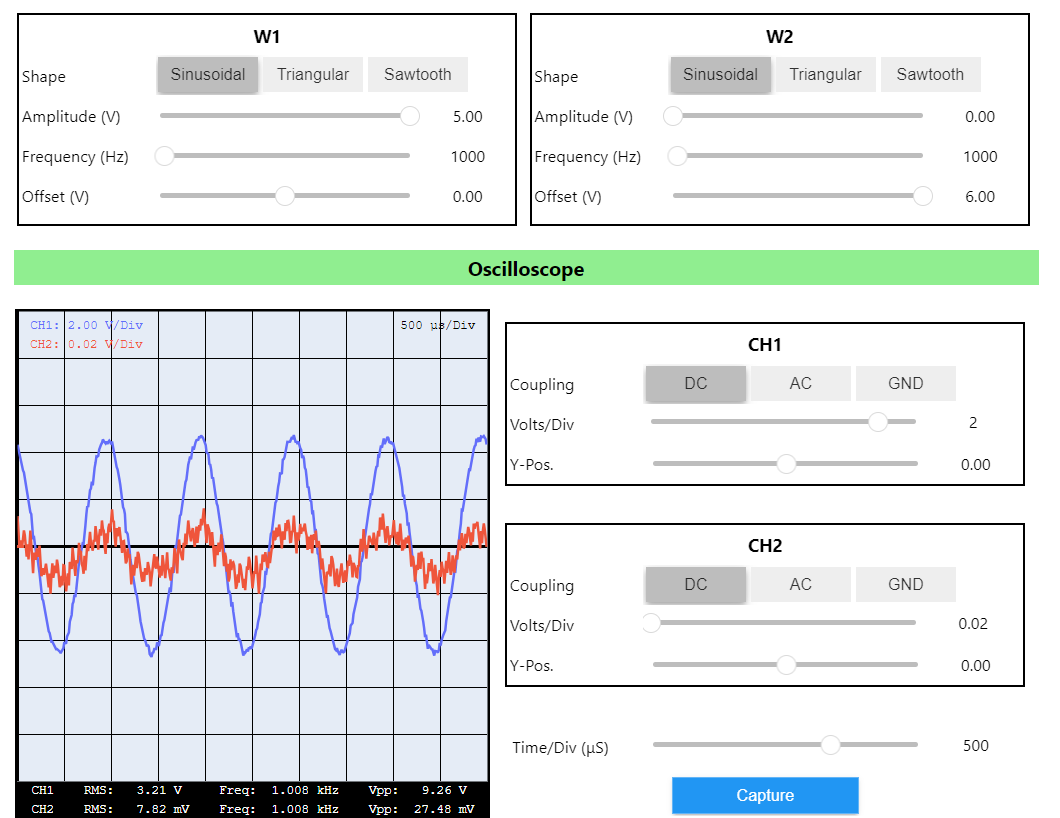

Observation: The output signal is prone to noise.

Comment: High V<sub>a</sub> leads to much lower gain.

#### Open-ended question

As we can see, the VCA is a non-inverting amplifier whose gain can be controlled by another voltage. Therefore, in the overall system, it is used to amplify a signal to a desired amplitude with a specified voltage.